# Classification

In [20]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

In [21]:
dat = sklearn.datasets.load_breast_cancer()

In [22]:
ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]

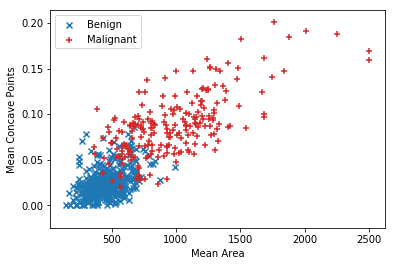

In [29]:
def plot_cells():
    plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend(['Benign', 'Malignant'])

plot_cells()

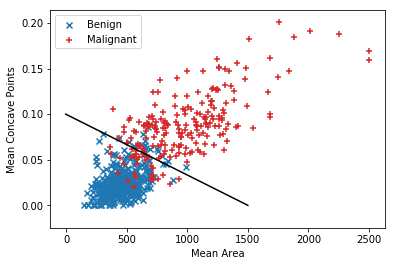

In [38]:
plot_cells()
plt.plot([-5, 1500], [0.10,0], 'k-')

* Inputs (features): $x_i ∈R^n,i=1,…,m$
* Outputs: $y_i ∈ \{-1, 1\} ,i=1,…,m $
* Parameters: $ θ ∈ R^d $
* Hypothesis function: $ h_\theta: R^n $
    * $\theta^T \cdot x $
* Loss function: $ ℓ: R+ $
* Canonical optimization problem:


### Potential Cost functions

1. Could try the **least squares function**, but note that least squares tries to get as close as possible instead of correctly classifying.

![](./resources/classification-ols.png)

2. Could try **zero-one function**

But problem with that is that cannot use gradient descent to determine which direction to move.

1. Use the sigmoid function as our link function 
    * Where a link function translates unbounded real outputs to bounded {0, 1}, represent probabilities of a specific outcome
    
2. 1, 0, 

$p^y_i*(1 - p)^{(1 - y_i)}$
* where $ p = 1/1 + e^{- x\theta} $

* $\prod_{i = 1}^m p^y_i*(1 - p)^{(1 - y_i)}$

* Find combinations of our thetas such that 

### Use the sigmoid 

a) So we say our outputs follow a bernoulli distribution 

$\sigma (a) = \frac{1}{1 + e^{-a}}$
* Where $a = x^T\theta$

* Note that as $\lim_{a \to \infty} \sigma(a) = 1$
* And $\lim_{a \to - \infty} \sigma(a) = 0$

Benefits of this 

* Interpretable
    * We can see the weights of each of the variables, and positive and negative showing the contribution of each 

In [ ]:
h(x) = x_1\theta_1 + x_2*\theta_2 

![](./resources/logistic-model.png)

### Predict the likelihood

* So let's rename $\sigma(a)$ as $p$.  
* If we want to predict the likelihood of each point, this is a bernoulli, where likelihood is $\sigma(a)$.

likelihood of one event= $p^{y_i}*(1 - p)^{1 - y_i}$

So now the likelihood of all of our events occuring is the product of these individual occurrences.

likelihood $ = \prod_{i = 1}^m p^{y_i}*(1 - p)^{1 - y_i}$

Now we want to find the parameters of $\sigma$ that maximize this likelihood, remembering that p depends on $\sigma$.  To do this, let's take the log, and then begin to plug back in our formula for $p$.

$ ll = - \sum_{i = 1}^m y log(p) + (1 - y)log(1 - p) $

$ ll = - \sum y log(\frac{1}{1 + e^{-\theta x}}) + (1 - y)log(1 - \frac{1}{1 + e^{-\theta x}}) $

This simplifies to our cost function:

ℓ $ =log(1+exp(−h_\theta(x)⋅y)) $

### Now take the gradient 

The deriative with respect to a $\theta$ of the logistic loss is given by

\begin{equation}
\begin{split}
\frac{\partial}{\partial \theta_j} \log(1+\exp(-\theta^T x \cdot y)) & = \frac{1}{1+\exp(-\theta^T x \cdot y)} \frac{\partial}{\partial \theta_j} (1+\exp(-\theta^T x \cdot y))\\  
& = - \frac{\exp(-\theta^T x \cdot y)}{1+\exp(-\theta^T x \cdot y)} x_j\cdot y \\
& = -\frac{1}{1+\exp(\theta^T x \cdot y)} x_j\cdot y
\end{split}
\end{equation}
where in the last line we use the fact that
\begin{equation}
\frac{\exp(-x)}{1+\exp(-x)} = \frac{\exp(-x)}{1+\exp(-x)} \cdot \frac{\exp(x)}{\exp(x)} = \frac{1}{1+\exp(x)}
\end{equation}

So, the gradient of the loss function for logistic regression  is given by

\begin{equation}
\begin{split}
\nabla_\theta E(\theta) & = 
\nabla_\theta \frac{1}{m} \sum_{i=1}^m \log \left (1+ \exp \left (\theta^T x^{(i)} \cdot y^{(i)} \right )\right) \\
& = \frac{1}{m} \sum_{i=1}^m -x^{(i)} y^{(i)} \frac{1}{1+\exp\left(\theta^T x^{(i)} \cdot y^{(i)}\right)}.
\end{split}
\end{equation}


### Now we move this into matrix form

This should move to:

$A^T y$

In [60]:
X0 = np.asarray([dat["data"][:,ix], dat["data"][:,iy], np.ones(dat["data"].shape[0])]).T
y0 = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

In [69]:
def logistic_reg_gd(X, y, alpha, iters):
    m,n = X.shape
    theta = np.zeros(n)
    YX = X * y[:,None]
    # Note that this is the same as X transpose dot y
    loss, err = np.zeros(iters), np.zeros(iters)
    for t in range(iters):
        hy = YX @ theta
        loss[t] = np.log(1+np.exp(-hy)).mean()
        err[t] = (hy <= 0).mean()
        theta -= alpha * -YX.T @ (1/(1+np.exp(YX @ theta)))/m
    return theta, loss, err

In [62]:
theta, loss, err = logistic_reg_gd(X0,y0, 1.0, 500)

/Users/flatironschool/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/Users/flatironschool/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


In [63]:
theta

array([-123.17073814,    2.76782807,  -92.20826011])